In [0]:
!pip install tensorflow==1.15

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
print("Training set (images): {}".format(mnist.train.images.shape))
print("Training set (labels): {}".format(mnist.train.labels.shape))
print("Test set (images): {}".format(mnist.test.images.shape))
print("Test set (labels): {}".format(mnist.test.labels.shape))

Training set (images): (55000, 784)
Training set (labels): (55000, 10)
Test set (images): (10000, 784)
Test set (labels): (10000, 10)


In [0]:
label_names = [
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

y = 3 (Dress)


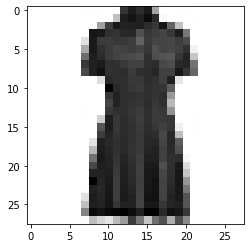

In [0]:
sample_1 = mnist.train.images[47].reshape(28, 28)
sample_label_1 = np.where(mnist.train.labels[47] == 1)[0][0]

print("y = {label_index} ({label})".format(
label_index=sample_label_1, label=label_names[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

In [0]:
X=tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y=tf.placeholder(dtype=tf.float32, shape=[None, 10])

X_image = tf.reshape(X, [-1,28,28,1])

In [0]:
W1=tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
relu_1=tf.nn.relu(tf.nn.conv2d(X_image, W1,strides=[1,1,1,1],padding='SAME'))
max_pool_1=tf.nn.max_pool(relu_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W2=tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
relu_2=tf.nn.relu(tf.nn.conv2d(max_pool_1, W2 ,strides=[1,1,1,1],padding='SAME'))
max_pool_2=tf.nn.max_pool(relu_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W3=tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
relu_3=tf.nn.relu(tf.nn.conv2d(max_pool_2, W3, strides=[1,1,1,1],padding='SAME'))
max_pool_3=tf.nn.max_pool(relu_3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W4=tf.Variable(tf.random_normal([128*4*4,625]))
max_pool_3=tf.reshape(max_pool_3, [-1, W4.get_shape().as_list()[0]])
relu=tf.nn.relu(tf.matmul(max_pool_3, W4))

W0=tf.Variable(tf.random_normal([625,10]))
S=tf.matmul(relu, W0)

In [0]:
hypothesis=S
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

corrects=tf.equal(tf.argmax(hypothesis,axis=1), tf.argmax(Y,axis=1))
accuracy=tf.reduce_mean(tf.cast(corrects, tf.float32))

In [0]:
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 100

optimizer=tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(EPOCHS):
    for _ in range(int(mnist.train.num_examples / BATCH_SIZE)):
      X_batch, Y_batch = mnist.train.next_batch(BATCH_SIZE)
      sess.run(optimizer, feed_dict={X: X_batch, Y: Y_batch})

    if (epoch+1) % 1 == 0:
      acc_val=sess.run(accuracy,
                       feed_dict={X: mnist.test.images, Y:mnist.test.labels})
      print("epoch: {:04d}, accuracy: {:.2f}".format(epoch+1, acc_val))

  print("Learning finished.")

  pred_val=sess.run(hypothesis, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
  print(classification_report(mnist.test.labels.argmax(axis=1),pred_val.argmax(axis=1), target_names=label_names))

epoch: 0001, accuracy: 0.74
epoch: 0002, accuracy: 0.83
epoch: 0003, accuracy: 0.84
epoch: 0004, accuracy: 0.86
epoch: 0005, accuracy: 0.87
epoch: 0006, accuracy: 0.88
epoch: 0007, accuracy: 0.88
epoch: 0008, accuracy: 0.88
epoch: 0009, accuracy: 0.89
epoch: 0010, accuracy: 0.88
epoch: 0011, accuracy: 0.89
epoch: 0012, accuracy: 0.89
epoch: 0013, accuracy: 0.89
epoch: 0014, accuracy: 0.89
epoch: 0015, accuracy: 0.89
epoch: 0016, accuracy: 0.89
epoch: 0017, accuracy: 0.89
epoch: 0018, accuracy: 0.89
epoch: 0019, accuracy: 0.90
epoch: 0020, accuracy: 0.89
epoch: 0021, accuracy: 0.90
epoch: 0022, accuracy: 0.90
epoch: 0023, accuracy: 0.90
epoch: 0024, accuracy: 0.90
epoch: 0025, accuracy: 0.89
epoch: 0026, accuracy: 0.90
epoch: 0027, accuracy: 0.90
epoch: 0028, accuracy: 0.90
epoch: 0029, accuracy: 0.90
epoch: 0030, accuracy: 0.90
epoch: 0031, accuracy: 0.91
epoch: 0032, accuracy: 0.90
epoch: 0033, accuracy: 0.90
epoch: 0034, accuracy: 0.89
epoch: 0035, accuracy: 0.90
epoch: 0036, accurac